In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
tmp_rootdir = '/content/gdrive/My Drive/EEG/'
result_dir = tmp_rootdir + 'results/'
result_list = [str(i) for i in range(1,10)]

subj_list = ['001','002','003','004','005','006','007','008','009','010',
             '011','015','016',
             '021','022','024','025','027','029','030',
             '031','032','033']

In [0]:
def read_result(result_idx):
  CV_can = pd.read_csv(result_dir + "result%s/" %result_idx + "CV_can.csv", index_col=0)
  CV_rev = pd.read_csv(result_dir + "result%s/" %result_idx + "CV_rev.csv", index_col=0)

  return CV_can, CV_rev

In [0]:
can_1, rev_1 = read_result(1)
for i in range(1,len(result_list)-1):
  can_i, rev_i = read_result(i)
  can_1 = pd.concat([can_1, can_i], axis=1)
  rev_1 = pd.concat([rev_1, rev_i], axis=1)

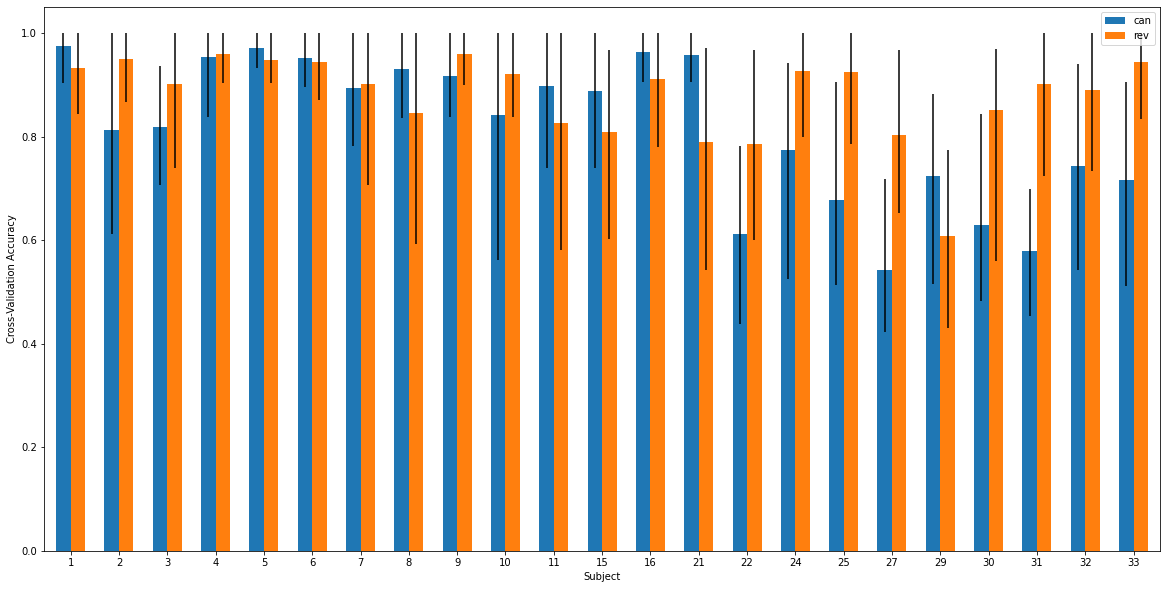

In [234]:
combine_df = pd.DataFrame({'can': can_1.mean(axis=1), 'rev': rev_1.mean(axis=1)})
CI_can = (can_1.mean(axis=1)-can_1.quantile(0.1, axis=1), can_1.quantile(0.9, axis=1)-can_1.mean(axis=1))
CI_rev = (rev_1.mean(axis=1)-rev_1.quantile(0.1, axis=1), rev_1.quantile(0.9, axis=1)-rev_1.mean(axis=1))

fig = combine_df.plot.bar(rot=0, figsize = (20, 10), width = 0.6, yerr={"can":CI_can,"rev":CI_rev})
fig.set_ylabel("Cross-Validation Accuracy")
fig.set_xlabel("Subject")
plt.show()

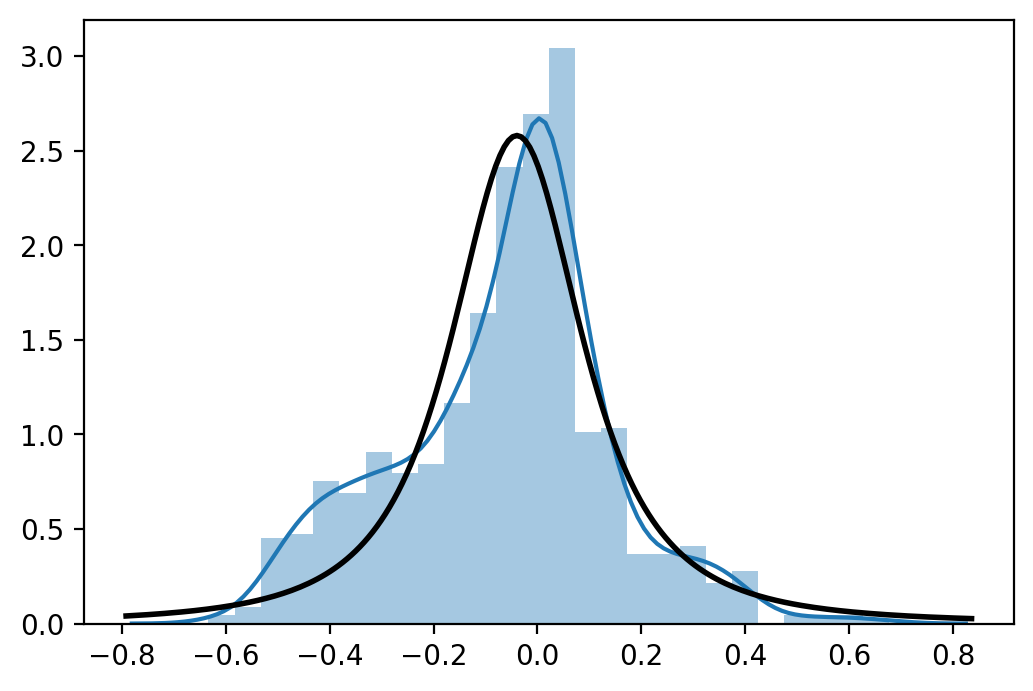

In [362]:
import seaborn as sns
from scipy import stats
class FixedT(stats.distributions.t_gen):
    df = 2
    def fit(self, *args, **kwargs):
        return stats.t.fit(*args, fix_df=self.df, **kwargs)

sns_fig= sns.distplot(can_1 - rev_1, fit=FixedT(),
             fit_kws={"color": "k", "lw": 2, "label": "t-Distribution"}, )
#sns.ylabel("Frequncy")
# plt.xlabel("Accuracy difference")
#plt.hist(can_1-rev_1, density=True)
fig = sns_fig.get_figure()
fig.set_dpi(200)
fig.show()
#fig.savefig(result_dir+"t.dist.png", dpi = 200)

ValueError: ignored

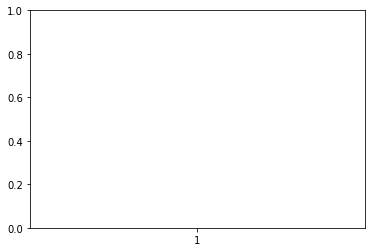

In [363]:
plt.bar(x = result_list, height=np.array(stats.ttest_1samp(can_1-rev_1, popmean = 0))[1])

In [364]:
t.stat = np.array(stats.ttest_ind(rev_1, can_1, equal_var=True, axis=1))
t.cdf(t.stat[0], df=2)

array([0.04853053, 0.98055692, 0.95616246, 0.6453579 , 0.14423346,
       0.35847665, 0.58291741, 0.04216614, 0.94551828, 0.95013337,
       0.0783963 , 0.0623719 , 0.04861715, 0.01644494, 0.98482457,
       0.98108419, 0.99335927, 0.99336556, 0.03354053, 0.98920917,
       0.99691425, 0.98118655, 0.99205513])

In [367]:
t.stat.shape

(2, 23)